# Stupidbirds Project



## Indicators of Heart Disease EDA

In [ ]:
!pip install shap
!pip3 install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 16.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 16

In [ ]:
#Library imports
import numpy as np # for vector / matrix operations
import pandas as pd # for data manipulation
from matplotlib import pyplot as plt # for basic plots
import seaborn as sns # for advanced plots
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

#root_dir = "/content/gdrive/MyDrive/"
indir = '/content/gdrive/MyDrive/stupidbirds/'
infile = indir + 'heart_2022_with_nans.csv'

Mounted at /content/gdrive


### Read in heart raw dataset (with NAs)

In [ ]:
df_heart = pd.read_csv(infile)
df_heart = df_heart[['RaceEthnicityCategory', 'AgeCategory', 'GeneralHealth',\
                     'PhysicalHealthDays', 'PhysicalActivities','SmokerStatus',\
                     'BMI',\
                     'MentalHealthDays', 'HadSkinCancer', 'HadStroke',\
                     'Sex', 'DifficultyWalking', 'AlcoholDrinkers',\
                     'SleepHours','HadAsthma','HadDiabetes',\
                     'HadKidneyDisease','HadHeartAttack']]

In [ ]:
df_heart.sample(5)

,RaceEthnicityCategory,AgeCategory,GeneralHealth,PhysicalHealthDays,PhysicalActivities,SmokerStatus,BMI,MentalHealthDays,HadSkinCancer,HadStroke,Sex,DifficultyWalking,AlcoholDrinkers,SleepHours,HadAsthma,HadDiabetes,HadKidneyDisease,HadHeartAttack
402891,"White only, Non-Hispanic",Age 55 to 59,Poor,30.0,No,Current smoker - now smokes some days,33.91,30.0,No,No,Male,Yes,Yes,4.0,Yes,No,No,No
26781,"White only, Non-Hispanic",Age 80 or older,Poor,NaN,No,Current smoker - now smokes every day,23.78,30.0,No,Yes,Female,Yes,Yes,7.0,No,No,No,No
212300,"White only, Non-Hispanic",Age 25 to 29,Very good,0.0,No,Never smoked,25.51,3.0,No,No,Female,No,Yes,6.0,No,No,No,No
10244,NaN,Age 40 to 44,Very good,3.0,Yes,Never smoked,23.01,2.0,No,No,Male,No,Yes,7.0,No,No,No,No
264858,Hispanic,Age 50 to 54,Excellent,0.0,Yes,Never smoked,25.77,0.0,No,No,Male,No,No,9.0,No,No,No,No


In [ ]:
df_heart.shape

(445132, 18)

In [ ]:
df_heart.columns

Index(['RaceEthnicityCategory', 'AgeCategory', 'GeneralHealth',
       'PhysicalHealthDays', 'PhysicalActivities', 'SmokerStatus', 'BMI',
       'MentalHealthDays', 'HadSkinCancer', 'HadStroke', 'Sex',
       'DifficultyWalking', 'AlcoholDrinkers', 'SleepHours', 'HadAsthma',
       'HadDiabetes', 'HadKidneyDisease', 'HadHeartAttack'],
      dtype='object')

In [ ]:
df_heart.isna().sum()

RaceEthnicityCategory    14057
AgeCategory               9079
GeneralHealth             1198
PhysicalHealthDays       10927
PhysicalActivities        1093
SmokerStatus             35462
BMI                      48806
MentalHealthDays          9067
HadSkinCancer             3143
HadStroke                 1557
Sex                          0
DifficultyWalking        24012
AlcoholDrinkers          46574
SleepHours                5453
HadAsthma                 1773
HadDiabetes               1087
HadKidneyDisease          1926
HadHeartAttack            3065
dtype: int64

<Axes: >

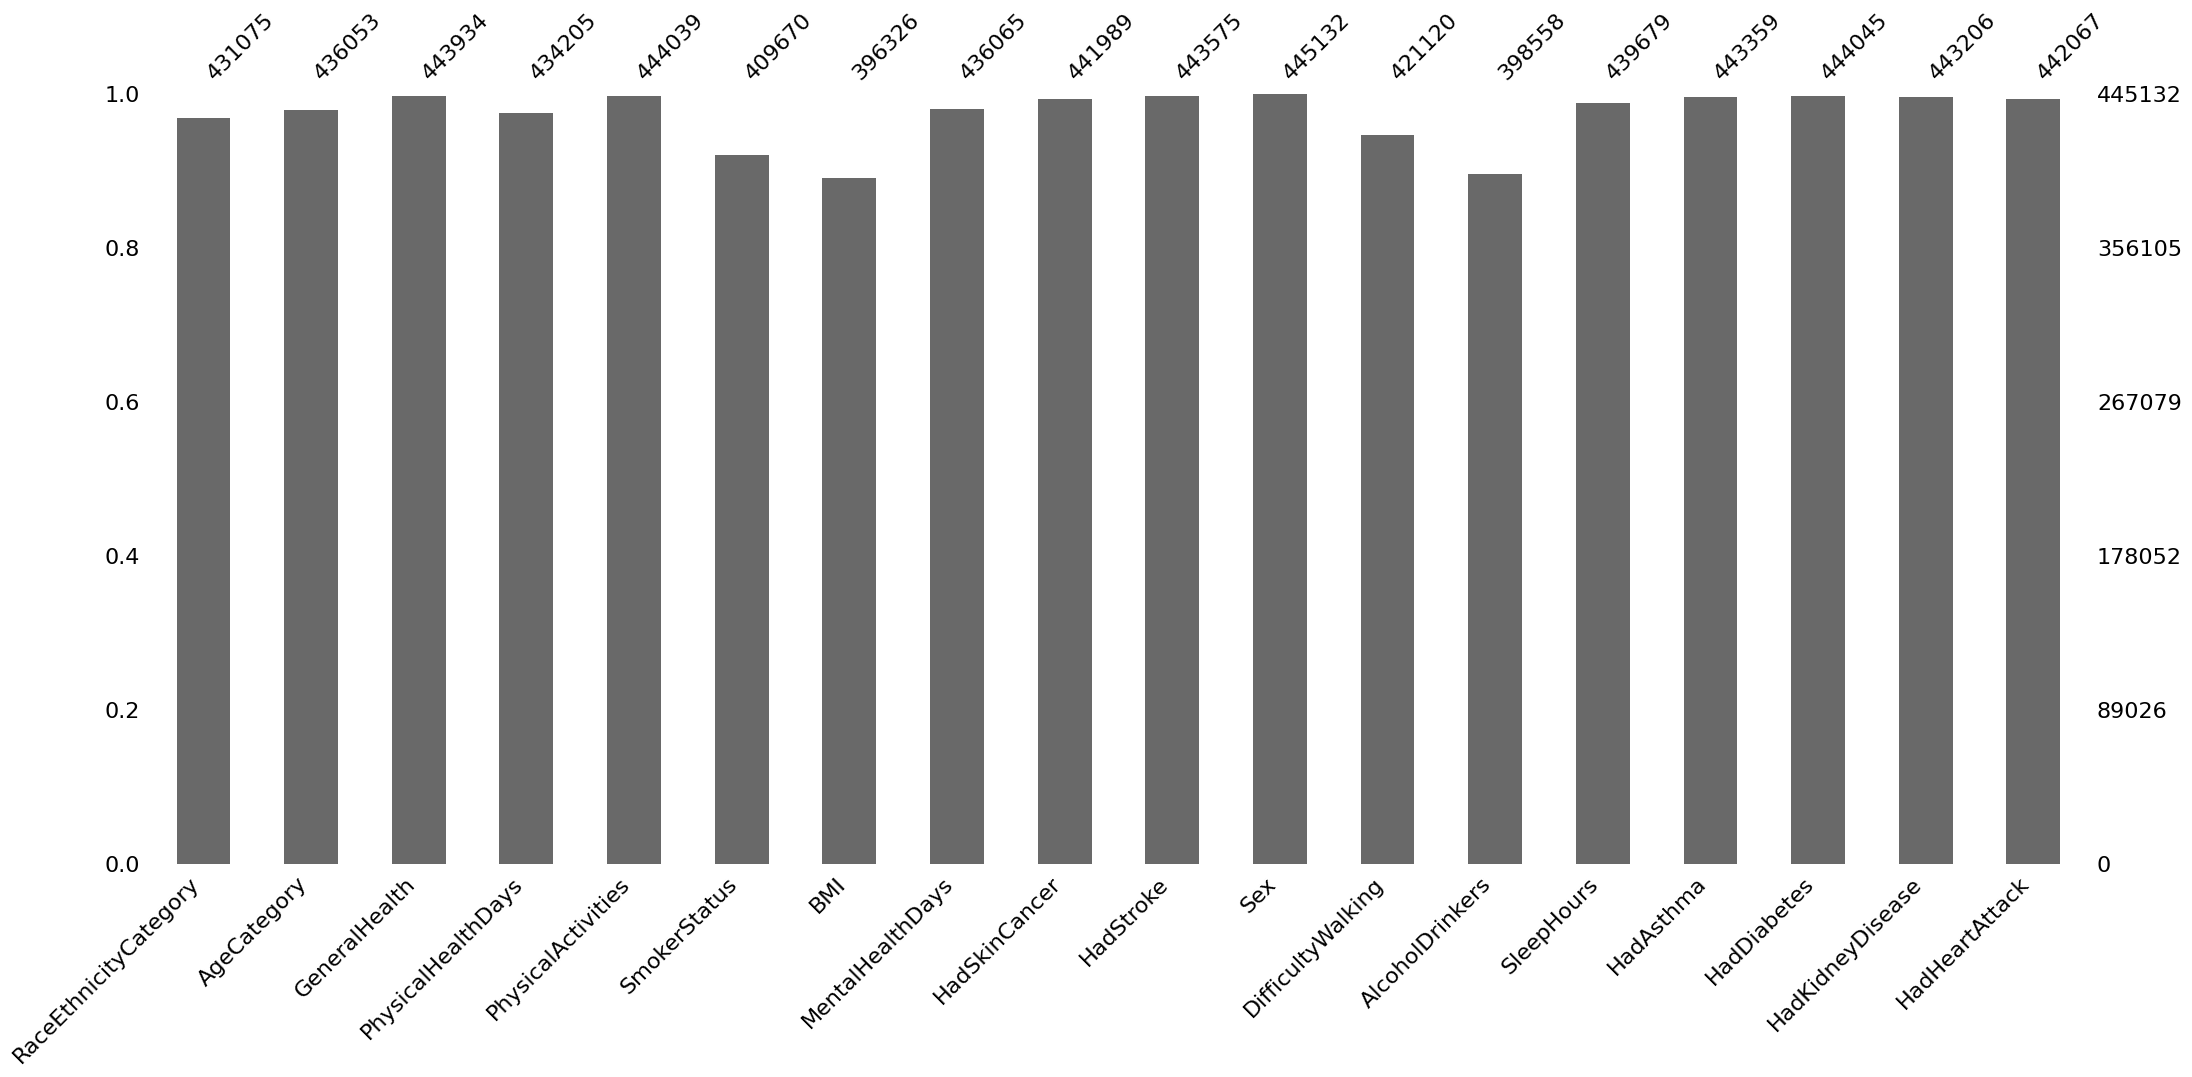

In [ ]:
msno.bar(df_heart)

In [ ]:
df_heart.describe()

,PhysicalHealthDays,BMI,MentalHealthDays,SleepHours
count,434205.000000,396326.000000,436065.000000,439679.000000
mean,4.347919,28.529842,4.382649,7.022983
std,8.688912,6.554889,8.387475,1.502425
min,0.000000,12.020000,0.000000,1.000000
25%,0.000000,24.130000,0.000000,6.000000
50%,0.000000,27.440000,0.000000,7.000000
75%,3.000000,31.750000,5.000000,8.000000
max,30.000000,99.640000,30.000000,24.000000


In [ ]:
df_heart['HadHeartAttack'].value_counts()

HadHeartAttack
No     416959
Yes     25108
Name: count, dtype: int64

In [ ]:
for column in df_heart:
    num_distinct_values = len(df_heart[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

RaceEthnicityCategory: 6 distinct values
AgeCategory: 14 distinct values
GeneralHealth: 6 distinct values
PhysicalHealthDays: 32 distinct values
PhysicalActivities: 3 distinct values
SmokerStatus: 5 distinct values
BMI: 3986 distinct values
MentalHealthDays: 32 distinct values
HadSkinCancer: 3 distinct values
HadStroke: 3 distinct values
Sex: 2 distinct values
DifficultyWalking: 3 distinct values
AlcoholDrinkers: 3 distinct values
SleepHours: 25 distinct values
HadAsthma: 3 distinct values
HadDiabetes: 5 distinct values
HadKidneyDisease: 3 distinct values
HadHeartAttack: 3 distinct values


<ipython-input-13-9b09561a6a7b>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  histplot = sns.histplot(data = df_heart, x='HadHeartAttack',\


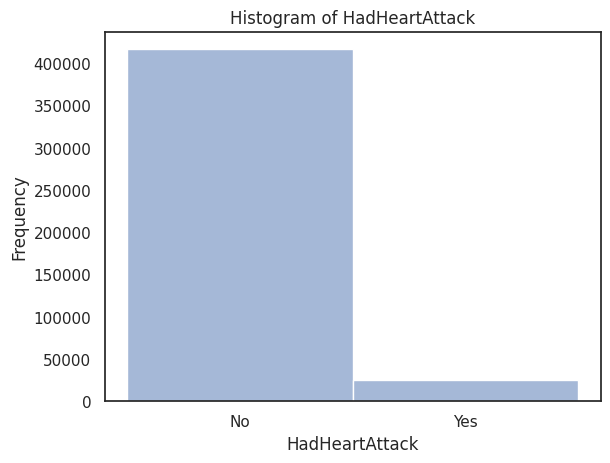

In [ ]:
sns.set_theme(style="white")
# Histogram by groups
histplot = sns.histplot(data = df_heart, x='HadHeartAttack',\
                        alpha=.5, palette="muted")
histplot.set( ylabel='Frequency', xlabel='HadHeartAttack',
           title= 'Histogram of HadHeartAttack')
plt.show()

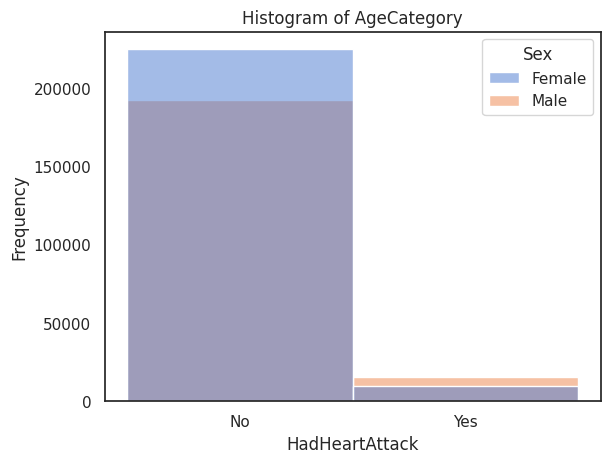

In [ ]:
#Histogram by groups
sns.set_theme(style="white")
# Histogram by groups
histplot = sns.histplot(data = df_heart, x='HadHeartAttack', hue = 'Sex',
                        alpha=.5, palette="muted")
histplot.set( ylabel='Frequency', xlabel='HadHeartAttack',
           title= 'Histogram of AgeCategory')
plt.show()

<Axes: xlabel='count', ylabel='GeneralHealth'>

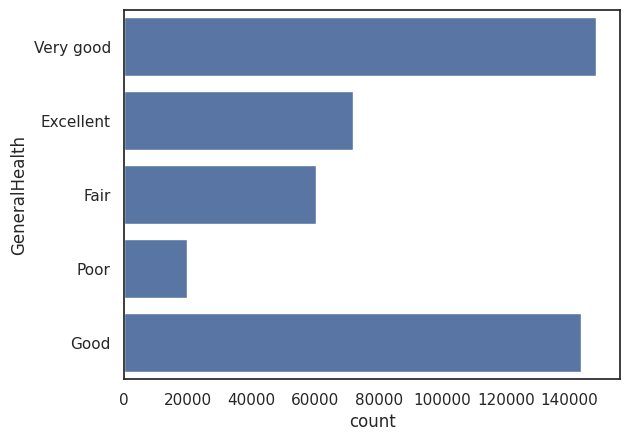

In [ ]:
sns.countplot(data=df_heart,y=df_heart['GeneralHealth'])

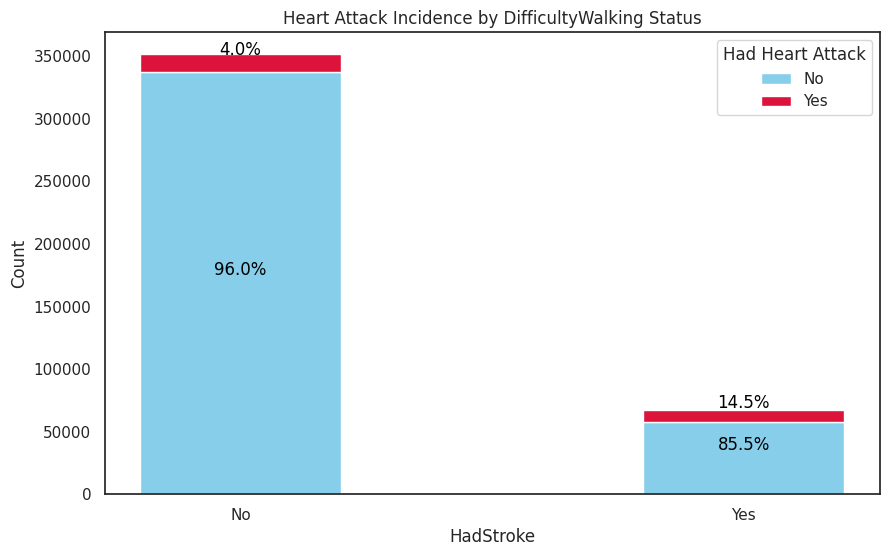

In [ ]:

# Calculate the counts for each category
counts = df_heart.groupby('DifficultyWalking')['HadHeartAttack'].value_counts().unstack()

# Calculate the percentages
percentages = (counts.T / counts.T.sum()).T * 100

# Create a wider bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Set the width of the bars
bar_width = 0.4

# Plot the 'No' bars
no_bars = ax.bar(counts.index, counts['No'], width=bar_width, color='#87CEEB', label='No')

# Plot the 'Yes' bars on top of the 'No' bars
yes_bars = ax.bar(counts.index, counts['Yes'], width=bar_width, bottom=counts['No'], color='#DC143C', label='Yes')

# Annotate the percentages on the bars
for bars, percent_values in zip([no_bars, yes_bars], [percentages['No'], percentages['Yes']]):
    for bar, percentage in zip(bars, percent_values):
        height = bar.get_height()
        ax.annotate(f'{percentage:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='black')

# Set labels and title
ax.set_xlabel('HadStroke')
ax.set_ylabel('Count')
ax.set_title('Heart Attack Incidence by DifficultyWalking Status')

# Include the legend
ax.legend(title='Had Heart Attack')

plt.show()

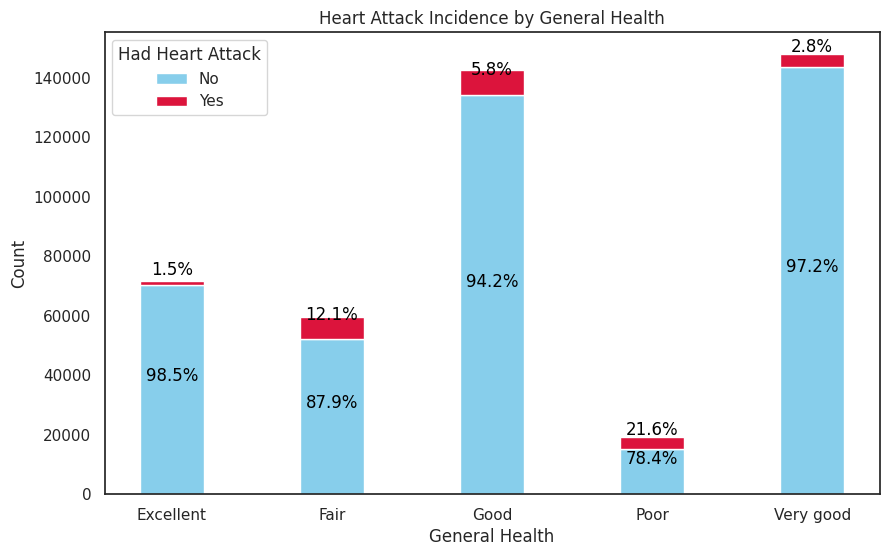

In [ ]:
counts = df_heart.groupby('GeneralHealth')['HadHeartAttack'].value_counts().unstack()

# Calculate the percentages
percentages = (counts.T / counts.T.sum()).T * 100

# Create a wider bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Set the width of the bars
bar_width = 0.4

# Plot the 'No' bars
no_bars = ax.bar(counts.index, counts['No'], width=bar_width, color='#87CEEB', label='No')

# Plot the 'Yes' bars on top of the 'No' bars
yes_bars = ax.bar(counts.index, counts['Yes'], width=bar_width, bottom=counts['No'], color='#DC143C', label='Yes')

# Annotate the percentages on the bars
for bars, percent_values in zip([no_bars, yes_bars], [percentages['No'], percentages['Yes']]):
    for bar, percentage in zip(bars, percent_values):
        height = bar.get_height()
        ax.annotate(f'{percentage:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='black')

# Set labels and title
ax.set_xlabel('General Health')
ax.set_ylabel('Count')
ax.set_title('Heart Attack Incidence by General Health')

# Include the legend
ax.legend(title='Had Heart Attack')

plt.show()

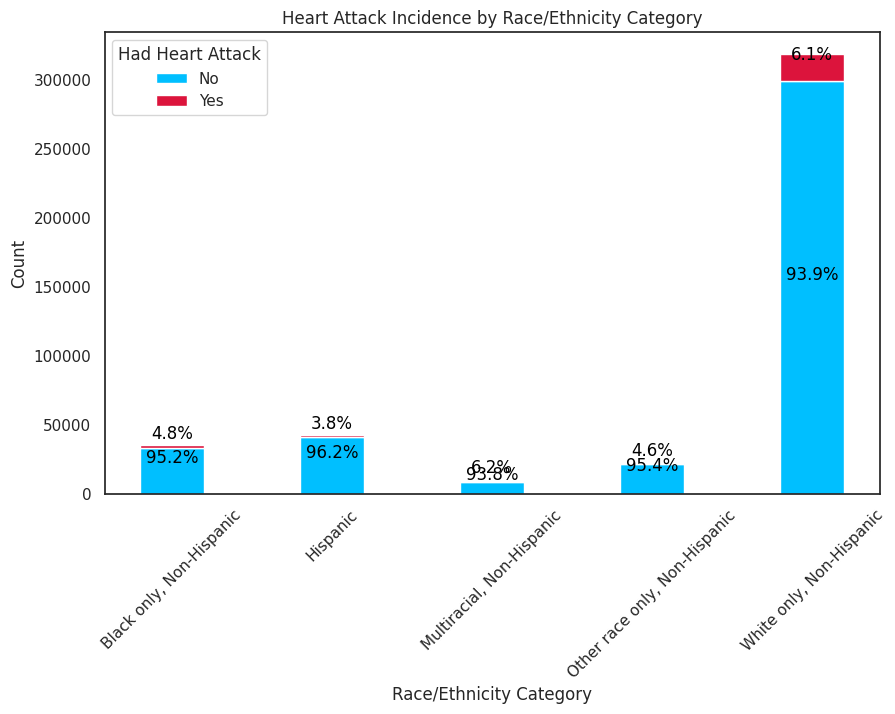

In [ ]:
# Calculate the counts for each category
counts = df_heart.groupby('RaceEthnicityCategory')['HadHeartAttack'].value_counts().unstack()

# Calculate the percentages
percentages = (counts.T / counts.T.sum()).T * 100

# Create a wider bar chart
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

# Set the width of the bars
bar_width = 0.4

# Plot the 'No' bars
no_bars = ax.bar(counts.index, counts['No'], width=bar_width, color='#00BFFF', label='No')

# Plot the 'Yes' bars on top of the 'No' bars
yes_bars = ax.bar(counts.index, counts['Yes'], width=bar_width, bottom=counts['No'], color='#DC143C', label='Yes')

# Annotate the percentages on the bars
for bars, percent_values in zip([no_bars, yes_bars], [percentages['No'], percentages['Yes']]):
    for bar, percentage in zip(bars, percent_values):
        height = bar.get_height()
        ax.annotate(f'{percentage:.1f}%',
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='black')

# Set labels and title
ax.set_xlabel('Race/Ethnicity Category')
ax.set_ylabel('Count')
ax.set_title('Heart Attack Incidence by Race/Ethnicity Category')

# Rotate x-tick labels if they overlap
plt.xticks(rotation=45)

# Include the legend
ax.legend(title='Had Heart Attack')

plt.show()

In [ ]:
cat_features = ['RaceEthnicityCategory', 'AgeCategory', 'GeneralHealth',\
                      'PhysicalActivities','SmokerStatus',\
                     'HadSkinCancer', 'HadStroke',\
                     'Sex', 'DifficultyWalking', 'AlcoholDrinkers',\
                     'HadAsthma','HadDiabetes',\
                     'HadKidneyDisease']
encoder = OneHotEncoder(sparse_output=False)
df_heart = encoder.transform(df_heart[cat_features])

numeric_features = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours' ]
numeric_corr = df_heart(df_heart[numeric_features]).corr()

plt.figure(figsize=(8, 6))
mypal = ['#FF5733', '#33FF57', '#3373FF', '#FF33F3', '#B4FFE4']
sns.heatmap(numeric_corr, annot=True, cmap=sns.color_palette(mypal), linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
numerical_cols = ['BMI', 'PhysicalHealthDays', 'MentalHealthDays', 'SleepHours' ]

palette = sns.color_palette(mypal)

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df_heart[column], color=palette[i-1], width=0.5)
    plt.axhline(y=df_heart[column].median(), color='red', linestyle='--', linewidth=2)
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In [ ]:
sns.set_theme(style="ticks")
spmat = sns.pairplot(df_heart, hue="HadHeartAttack")
plt.show()

##  Feature Engieering and Data Cleaning

We will simply drop all missing values as we have large numbers of observations in our dataset

In [ ]:
print(df_heart.shape)
df_heart.isna().sum()

In [ ]:
df_heart = df_heart.dropna()

In [ ]:
print(df_heart.shape)
df_heart.isna().sum()

## Handling Unbalanced Data

<Axes: ylabel='Type'>

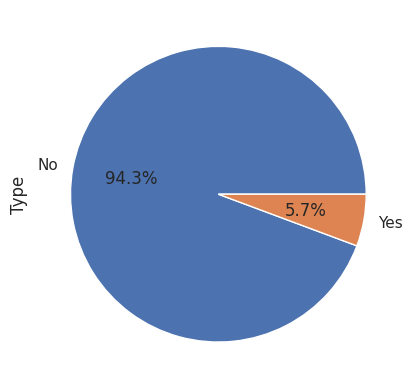

In [ ]:
df_heart.groupby('HadHeartAttack').size().plot(kind='pie',
                                       y = "HadHeartAttack",
                                       label = "Type",
                                       autopct='%1.1f%%')

In [ ]:
heart_yes = df_heart[df_heart['HadHeartAttack'] == "Yes"]
heart_no  = df_heart[df_heart['HadHeartAttack'] == "No"]
print(heart_yes.shape)
print(heart_no.shape)

(25108, 18)
(416959, 18)


In [ ]:
from sklearn.utils import resample
no_downsample = resample(heart_no,
                         replace = True,
                         n_samples = len(heart_yes),
                         random_state = 69)
print(no_downsample.shape)
heart_balanced = pd.concat([no_downsample, heart_yes])
heart_balanced.reset_index(drop=True, inplace=True)
print(heart_balanced.shape)

(25108, 18)
(50216, 18)


<Axes: ylabel='Type'>

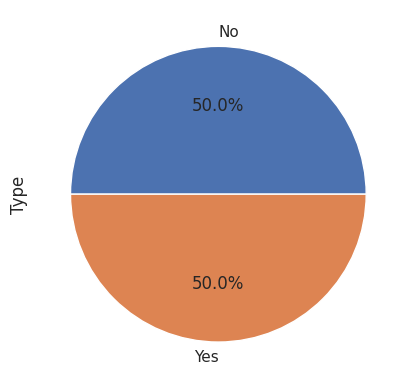

In [ ]:
heart_balanced.groupby('HadHeartAttack').size().plot(kind='pie',
                                       y = "HadHeartAttack",
                                       label = "Type",
                                       autopct='%1.1f%%')

## Initial split into test and non-test sets

In [ ]:
from sklearn.model_selection import train_test_split

heart_balanced = df_heart.dropna()

Heart_other, Heart_test = train_test_split(
  heart_balanced,
  train_size = 0.75,
  random_state = 425, # seed
  stratify = heart_balanced.HadHeartAttack
  )


In [ ]:
print (f"Size of training set : {Heart_other.shape[0]} rows , {Heart_other.shape[1]} columns")
print (f"Size of test set : {Heart_test.shape[0]} rows , {Heart_test.shape[1]} columns")

Size of training set : 251354 rows , 18 columns
Size of test set : 83785 rows , 18 columns


In [ ]:
cat_features = ['RaceEthnicityCategory', 'AgeCategory', 'GeneralHealth',\
                      'PhysicalActivities','SmokerStatus',\
                     'HadSkinCancer', 'HadStroke',\
                     'Sex', 'DifficultyWalking', 'AlcoholDrinkers',\
                     'HadAsthma','HadDiabetes',\
                     'HadKidneyDisease']
num_features = ['PhysicalHealthDays',	'BMI',	'MentalHealthDays',	'SleepHours']
features = np.concatenate([num_features, cat_features])
#Non-test X and y
X_other = Heart_other[features]
y_other = Heart_other.HadHeartAttack
#Test X and y
X_test = Heart_test[features]
y_test = Heart_test.HadHeartAttack

encoder = OneHotEncoder(sparse_output=False)
X_other = encoder.fit_transform(X_other[cat_features])
X_test = encoder.transform(X_test[cat_features])

## Drift Detection

## PyCaret

In [ ]:
from pycaret.utils import version
version()

'3.3.2'

In [ ]:
from pycaret import classification
# classification.setup() performs variaous preprocessing task on the data
# Arg1 : data = name of the dataframe
# Arg2 : target = name of the Y variable (aka claffication label)
classification_setup = classification.setup(data= Heart_other,
                                            target='HadHeartAttack',
                                            session_id = 123)

,Description,Value
0,Session id,123
1,Target,HadHeartAttack
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(251354, 18)"
5,Transformed data shape,"(251354, 44)"
6,Transformed train set shape,"(175947, 44)"
7,Transformed test set shape,"(75407, 44)"
8,Numeric features,4
9,Categorical features,13


In [ ]:
# Following one-line code fits 15 different models
# to the training data and reports out 6 model quality metrics
# For each model, best parameter choice is made using 10 fold CV
# At the end of the run, it highlights the best value of the metric
classification.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9448,0.8357,0.9448,0.9230,0.9222,0.0718,0.1374,4.5200
gbc,Gradient Boosting Classifier,0.9448,0.8365,0.9448,0.9232,0.9217,0.0638,0.1300,17.0230
ridge,Ridge Classifier,0.9446,0.8280,0.9446,0.8923,0.9178,0.0000,0.0000,1.7540
dummy,Dummy Classifier,0.9446,0.5000,0.9446,0.8923,0.9178,0.0000,0.0000,1.5690
ada,Ada Boost Classifier,0.9443,0.8364,0.9443,0.9212,0.9231,0.0909,0.1498,5.4200
svm,SVM - Linear Kernel,0.9439,0.7639,0.9439,0.9115,0.9186,0.0190,0.0445,3.3560
xgboost,Extreme Gradient Boosting,0.9438,0.8279,0.9438,0.9182,0.9217,0.0711,0.1244,3.3500
knn,K Neighbors Classifier,0.9416,0.6207,0.9416,0.9076,0.9190,0.0402,0.0685,27.2600
rf,Random Forest Classifier,0.9408,0.7821,0.9408,0.9065,0.9188,0.0413,0.0662,16.6280
lda,Linear Discriminant Analysis,0.9338,0.8280,0.9338,0.9198,0.9257,0.2167,0.2250,2.0620


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Gradient Boosting

In [ ]:
model_gb = classification.create_model('gbc')

In [ ]:
classification.plot_model(model_gb, plot = 'auc')

In [ ]:
classification.plot_model(model_gb, plot = 'pr')

In [ ]:
classification.plot_model(model_gb, plot = 'boundary')

In [ ]:
classification.plot_model(model_gb, plot = 'pr')

In [ ]:
classification.plot_model(model_gb, plot = 'vc')

In [ ]:
classification.plot_model(model_gb, plot = 'feature')

In [ ]:
classification.plot_model(model_gb, plot = 'confusion_matrix')

## Logistic Regression

In [ ]:
model_lg = classification.create_model('lr')

In [ ]:
classification.plot_model(model_lg, plot = 'auc')

In [ ]:
classification.plot_model(model_lg, plot = 'pr')

In [ ]:
classification.plot_model(model_lg, plot = 'vc')

### XGBoost

In [ ]:
model_xgb = classification.create_model('xgboost')

In [ ]:
model_xgb

In [ ]:
#AUC-ROC plot
classification.plot_model(model_xgb, plot = 'auc')

In [ ]:
#Decision boundary
classification.plot_model(model_xgb, plot = 'boundary')

In [ ]:
#Precision-Recall curve
classification.plot_model(model_xgb, plot = 'pr')

In [ ]:
#Validation Curve
classification.plot_model(model_xgb, plot = 'vc')

In [ ]:
#Feature importance plot
classification.plot_model(model_xgb, plot = 'feature')

In [ ]:
#Confusion matrix
classification.plot_model(model_xgb, plot = 'confusion_matrix')

In [ ]:
# Interpret model
classification.interpret_model(model_xgb)
# For Xgb model, the plot produces (y= feature, X=Shapely value)

###Random Forest

In [ ]:
model_rf = classification.create_model('rf')

In [ ]:
model_rf

In [ ]:
classification.plot_model(model_rf, plot = 'auc')

In [ ]:
classification.plot_model(model_rf, plot = 'boundary')

In [ ]:
classification.plot_model(model_rf, plot = 'pr')

In [ ]:
classification.plot_model(model_rf, plot = 'vc')

In [ ]:
classification.plot_model(model_rf, plot = 'feature')

In [ ]:
#Confusion matrix
classification.plot_model(model_rf, plot = 'confusion_matrix')

In [ ]:
classification.interpret_model(model_rf)

## SVM

In [ ]:
model_svm = classification.create_model('svm')

In [ ]:
classification.plot_model(model_svm, plot = 'boundary')

In [ ]:
classification.plot_model(model_svm, plot = 'pr')

In [ ]:
classification.plot_model(model_svm, plot = 'vc')

In [ ]:
classification.plot_model(model_svm, plot = 'feature')

In [ ]:
classification.plot_model(model_svm, plot = 'confusion_matrix')

## Decision Tree

In [ ]:
model_dt = classification.create_model('dt')

In [ ]:
classification.plot_model(model_dt, plot = 'auc')

In [ ]:
classification.plot_model(model_dt, plot = 'boundary')

In [ ]:
classification.plot_model(model_dt, plot = 'pr')

In [ ]:
classification.plot_model(model_dt, plot = 'vc')

In [ ]:
classification.plot_model(model_dt, plot = 'feature')

In [ ]:
classification.plot_model(model_dt, plot = 'confusion_matrix')

In [ ]:
classification.interpret_model(model_dt)

## Building Ensemble Model

### Bagging Based Ensemble

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
bagged_model = BaggingClassifier(LogisticRegression(solver='liblinear'),
                                 max_samples = 150, max_features = 5,
                                 bootstrap = True, bootstrap_features = True,
                                 oob_score = True,
                                 random_state = 42
                                 )

In [ ]:
bagged_model.fit(X_other,y_other)

In [ ]:
bagged_model.oob_score_

In [ ]:
# Run the model on the test data

# Binary prediction from the model
y_test_pred = bagged_model.predict(X_test)

# predicted probabilities form the model
y_test_pred_prob = bagged_model.predict_proba(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [ ]:
target_names = ['Yes','No']
print(classification_report(y_test, y_test_pred, target_names=target_names))

In [ ]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_Heart_Attack', 'predicted_Had_Heart_Attack']
cnf_matrix.index = ['true_no_Heart_Attack', 'true_Had_Heart_Attack']
cnf_matrix

### Voting Classifiers

In [ ]:
from sklearn.ensemble import  VotingClassifier
from sklearn.naive_bayes import GaussianNB
# Linear Support vector machine for classification
from sklearn.svm import LinearSVC

In [ ]:
# Voting classifiers
clf_LR = LogisticRegression(random_state=42)
clf_GNB = GaussianNB()
clf_SVM = LinearSVC()


In [ ]:
# Define the ensemble model
ensmb1 = VotingClassifier(estimators=[('lr', clf_LR),
                                     ('gnb', clf_GNB),
                                     ('svm', clf_SVM)],
                         voting='hard')

# Fit the ensemble model
ensmb1 = ensmb1.fit(X_other,y_other)

In [ ]:
y_test_pred = ensmb1.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
target_names = ['Yes','No']
print(classification_report(y_test, y_test_pred, target_names=target_names))

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_Heart_Attack', 'predicted_Had_Heart_Attack']
cnf_matrix.index = ['true_no_Heart_Attack', 'true_Had_Heart_Attack']
cnf_matrix

## Final Fitting to the Test Data

### Gradient Boosting

In [ ]:
predictionsGB = classification.predict_model(model_gb, data=Heart_test)
predictionsGB

### Logistic Regression

In [ ]:
predictionsLOG = classification.predict_model(model_lg, data=Heart_test)
predictionsLOG

### Voting Classifiers

In [ ]:
y_test_pred = ensmb1.predict(X_test)
from sklearn.metrics import classification_report
target_names = ['Yes','No']
print(classification_report(y_test, y_test_pred, target_names=target_names))

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred)
cnf_matrix = pd.DataFrame(cnf_matrix)
cnf_matrix.columns = ['predicted_no_Heart_Attack', 'predicted_Had_Heart_Attack']
cnf_matrix.index = ['true_no_Heart_Attack', 'true_Had_Heart_Attack']
cnf_matrix

### XGboost

In [ ]:
predictionsXG = classification.predict_model(model_xgb, data=Heart_test)
predictionsXG